# Regression Analysis with Regularization

**Student:** Dheeraj K  
**Course:** MSCS-634  
**Lab:** 4

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [ ]:
# Load dataset
diabetes = load_diabetes()
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
y = pd.Series(diabetes.target, name='target')

print("Dataset Shape:", X.shape)
print("\nFeature Names:")
print(diabetes.feature_names)
print("\nFirst few rows:")
print(X.head())
print("\nTarget (first 5):")
print(y.head())

Dataset Shape: (442, 10)

Feature Names:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

First few rows of the dataset:
        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  
0 -0.002592  0.019907 -0.017646  
1 -0.039493 -0.068332 -0.092204  
2 -0.002592  0.002861 -0.025930  
3  0.034309  0.022688 -0.009362  
4 -0.002592 -0.031988 -0.046641  

Target variable (first 5 values):
0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64


In [ ]:
# Data exploration
print("Missing values:", X.isnull().sum().sum())
print("\nStatistical Summary:")
print(X.describe())
print("\nTarget Summary:")
print(y.describe())

Missing values in features:
age    0
sex    0
bmi    0
bp     0
s1     0
s2     0
s3     0
s4     0
s5     0
s6     0
dtype: int64

Missing values in target:
0

Statistical Summary of Features:
                age           sex           bmi            bp            s1  \
count  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02  4.420000e+02   
mean  -2.511817e-19  1.230790e-17 -2.245564e-16 -4.797570e-17 -1.381499e-17   
std    4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02  4.761905e-02   
min   -1.072256e-01 -4.464164e-02 -9.027530e-02 -1.123988e-01 -1.267807e-01   
25%   -3.729927e-02 -4.464164e-02 -3.422907e-02 -3.665608e-02 -3.424784e-02   
50%    5.383060e-03 -4.464164e-02 -7.283766e-03 -5.670422e-03 -4.320866e-03   
75%    3.807591e-02  5.068012e-02  3.124802e-02  3.564379e-02  2.835801e-02   
max    1.107267e-01  5.068012e-02  1.705552e-01  1.320436e-01  1.539137e-01   

                 s2            s3            s4            s5            s6  
count  4.420000e

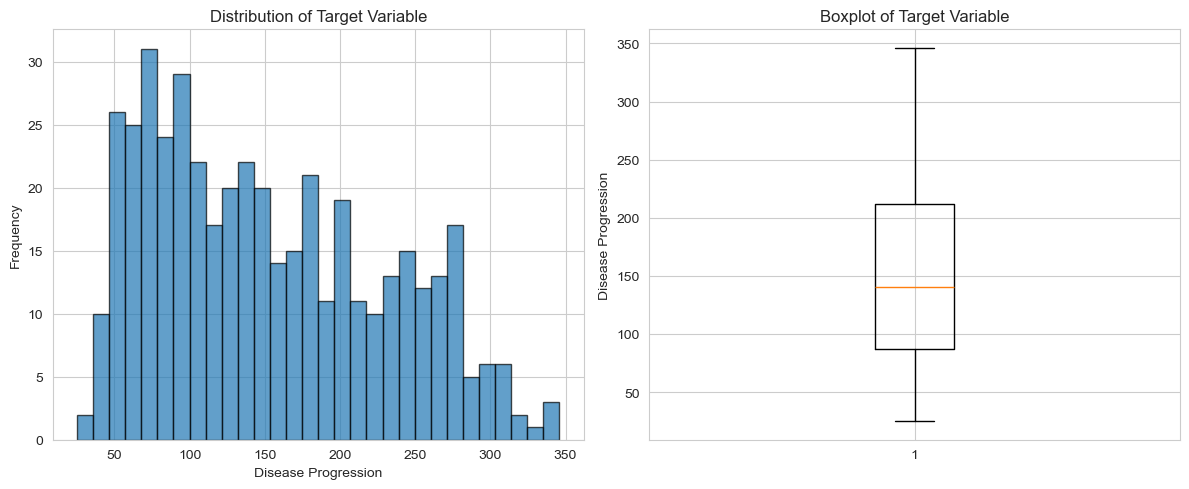

Target variable range: 25.0 to 346.0


In [ ]:
# Target distribution
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(y, bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Disease Progression')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=True)
plt.ylabel('Disease Progression')
plt.title('Boxplot of Target Variable')
plt.tight_layout()
plt.savefig('screenshots/01_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()
print(f"Target range: {y.min()} to {y.max()}")

In [ ]:
# Simple Linear Regression (BMI only)
X_simple = X[['bmi']].values
y_simple = y.values
X_train_simple, X_test_simple, y_train_simple, y_test_simple = train_test_split(
    X_simple, y_simple, test_size=0.2, random_state=42
)

simple_lr = LinearRegression()
simple_lr.fit(X_train_simple, y_train_simple)
y_pred_simple = simple_lr.predict(X_test_simple)

mae_simple = mean_absolute_error(y_test_simple, y_pred_simple)
mse_simple = mean_squared_error(y_test_simple, y_pred_simple)
rmse_simple = np.sqrt(mse_simple)
r2_simple = r2_score(y_test_simple, y_pred_simple)

print("Simple Linear Regression:")
print(f"MAE: {mae_simple:.2f}")
print(f"MSE: {mse_simple:.2f}")
print(f"RMSE: {rmse_simple:.2f}")
print(f"R²: {r2_simple:.4f}")

Simple Linear Regression Performance:
MAE: 52.26
MSE: 4061.83
RMSE: 63.73
R²: 0.2334

Model Coefficients:
Slope: 998.58
Intercept: 152.00


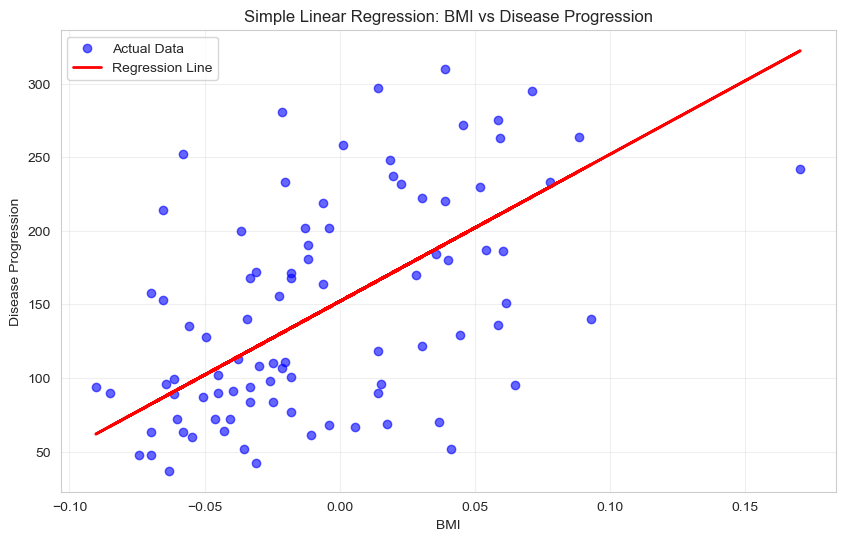

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_simple, y_test_simple, color='blue', alpha=0.6, label='Actual')
plt.plot(X_test_simple, y_pred_simple, color='red', linewidth=2, label='Prediction')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Simple Linear Regression')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('screenshots/02_simple_linear_regression.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Multiple Regression (all features)
X_multi = X.values
y_multi = y.values
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(
    X_multi, y_multi, test_size=0.2, random_state=42
)

multi_lr = LinearRegression()
multi_lr.fit(X_train_multi, y_train_multi)
y_pred_multi = multi_lr.predict(X_test_multi)

mae_multi = mean_absolute_error(y_test_multi, y_pred_multi)
mse_multi = mean_squared_error(y_test_multi, y_pred_multi)
rmse_multi = np.sqrt(mse_multi)
r2_multi = r2_score(y_test_multi, y_pred_multi)

print("Multiple Regression:")
print(f"MAE: {mae_multi:.2f}")
print(f"MSE: {mse_multi:.2f}")
print(f"RMSE: {rmse_multi:.2f}")
print(f"R²: {r2_multi:.4f}")

Multiple Regression Performance:
MAE: 42.79
MSE: 2900.19
RMSE: 53.85
R²: 0.4526

Number of features used: 10


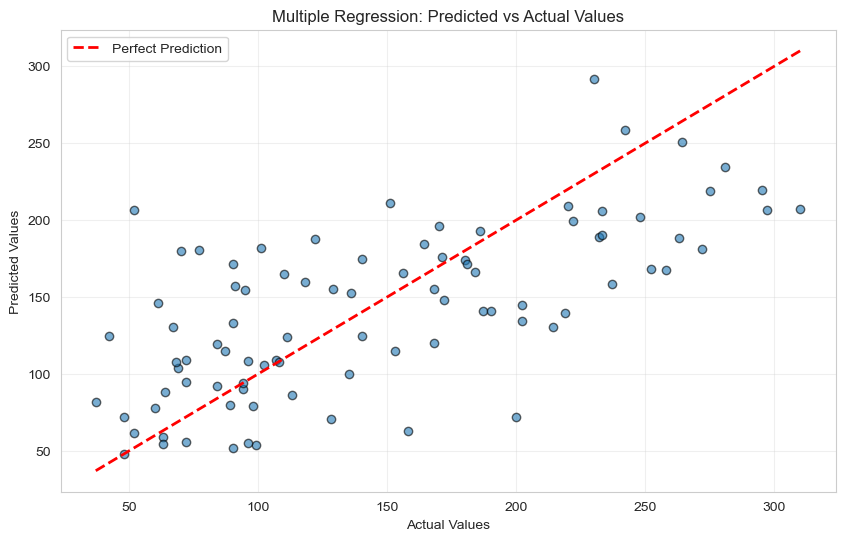

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_multi, y_pred_multi, alpha=0.6, edgecolors='k')
plt.plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Multiple Regression')
plt.grid(True, alpha=0.3)
plt.savefig('screenshots/03_multiple_regression.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Polynomial Regression
degrees = [2, 3, 4]
poly_results = {}

for degree in degrees:
    poly_features = PolynomialFeatures(degree=degree)
    X_poly = poly_features.fit_transform(X_multi)
    X_train_poly, X_test_poly, y_train_poly, y_test_poly = train_test_split(
        X_poly, y_multi, test_size=0.2, random_state=42
    )
    poly_lr = LinearRegression()
    poly_lr.fit(X_train_poly, y_train_poly)
    y_pred_poly = poly_lr.predict(X_test_poly)
    
    mae = mean_absolute_error(y_test_poly, y_pred_poly)
    mse = mean_squared_error(y_test_poly, y_pred_poly)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_poly, y_pred_poly)
    
    poly_results[degree] = {
        'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2,
        'predictions': y_pred_poly, 'actual': y_test_poly
    }
    
    print(f"Polynomial (Degree {degree}): MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

Polynomial Regression (Degree 2) Performance:
MAE: 43.58
MSE: 3096.03
RMSE: 55.64
R²: 0.4156
Number of features after transformation: 66
--------------------------------------------------
Polynomial Regression (Degree 3) Performance:
MAE: 178.97
MSE: 88656.45
RMSE: 297.75
R²: -15.7335
Number of features after transformation: 286
--------------------------------------------------
Polynomial Regression (Degree 4) Performance:
MAE: 261.67
MSE: 146907.59
RMSE: 383.29
R²: -26.7281
Number of features after transformation: 1001
--------------------------------------------------


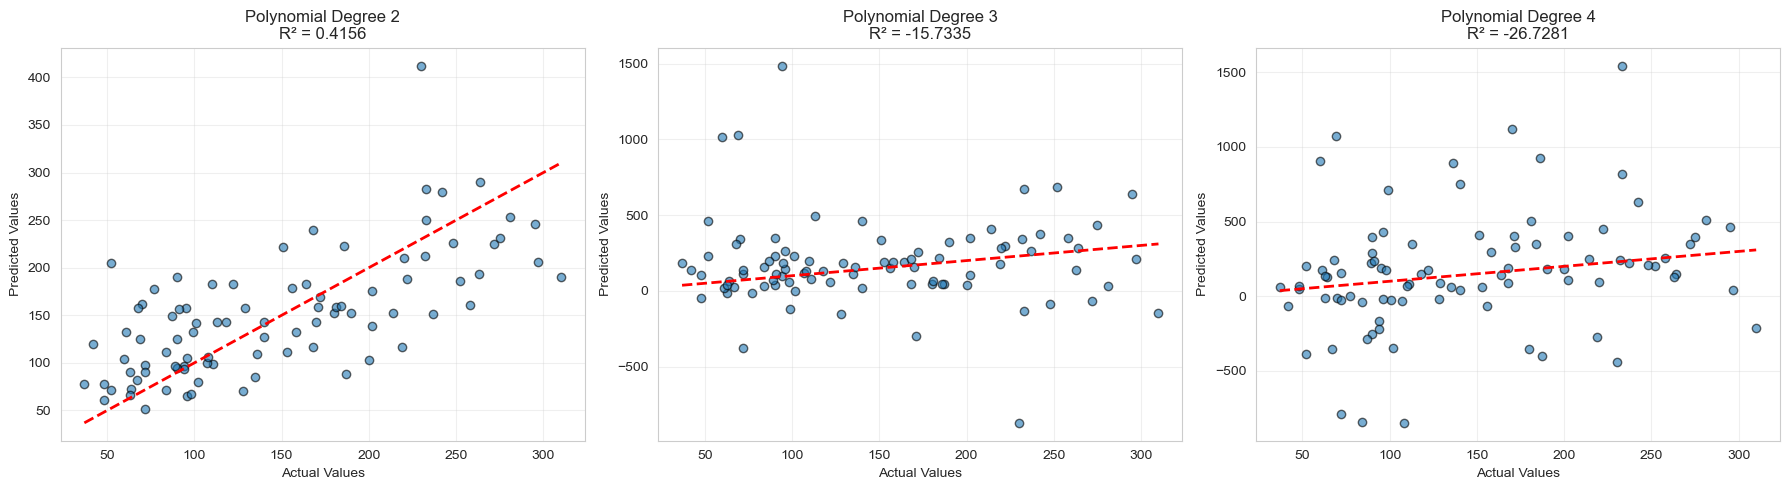

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, degree in enumerate(degrees):
    axes[idx].scatter(poly_results[degree]['actual'], poly_results[degree]['predictions'], alpha=0.6, edgecolors='k')
    axes[idx].plot([poly_results[degree]['actual'].min(), poly_results[degree]['actual'].max()],
                    [poly_results[degree]['actual'].min(), poly_results[degree]['actual'].max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')
    axes[idx].set_title(f'Polynomial Degree {degree}\nR² = {poly_results[degree]["R²"]:.4f}')
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('screenshots/04_polynomial_regression.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Ridge Regression
alphas = [0.1, 1.0, 10.0, 100.0]
ridge_results = {}

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_multi, y_train_multi)
    y_pred_ridge = ridge.predict(X_test_multi)
    
    mae = mean_absolute_error(y_test_multi, y_pred_ridge)
    mse = mean_squared_error(y_test_multi, y_pred_ridge)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_multi, y_pred_ridge)
    
    ridge_results[alpha] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'predictions': y_pred_ridge}
    print(f"Ridge (α={alpha}): MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}")

Ridge Regression (alpha=0.1) Performance:
MAE: 43.00
MSE: 2856.49
RMSE: 53.45
R²: 0.4609
--------------------------------------------------
Ridge Regression (alpha=1.0) Performance:
MAE: 46.14
MSE: 3077.42
RMSE: 55.47
R²: 0.4192
--------------------------------------------------
Ridge Regression (alpha=10.0) Performance:
MAE: 58.03
MSE: 4443.95
RMSE: 66.66
R²: 0.1612
--------------------------------------------------
Ridge Regression (alpha=100.0) Performance:
MAE: 63.24
MSE: 5233.66
RMSE: 72.34
R²: 0.0122
--------------------------------------------------


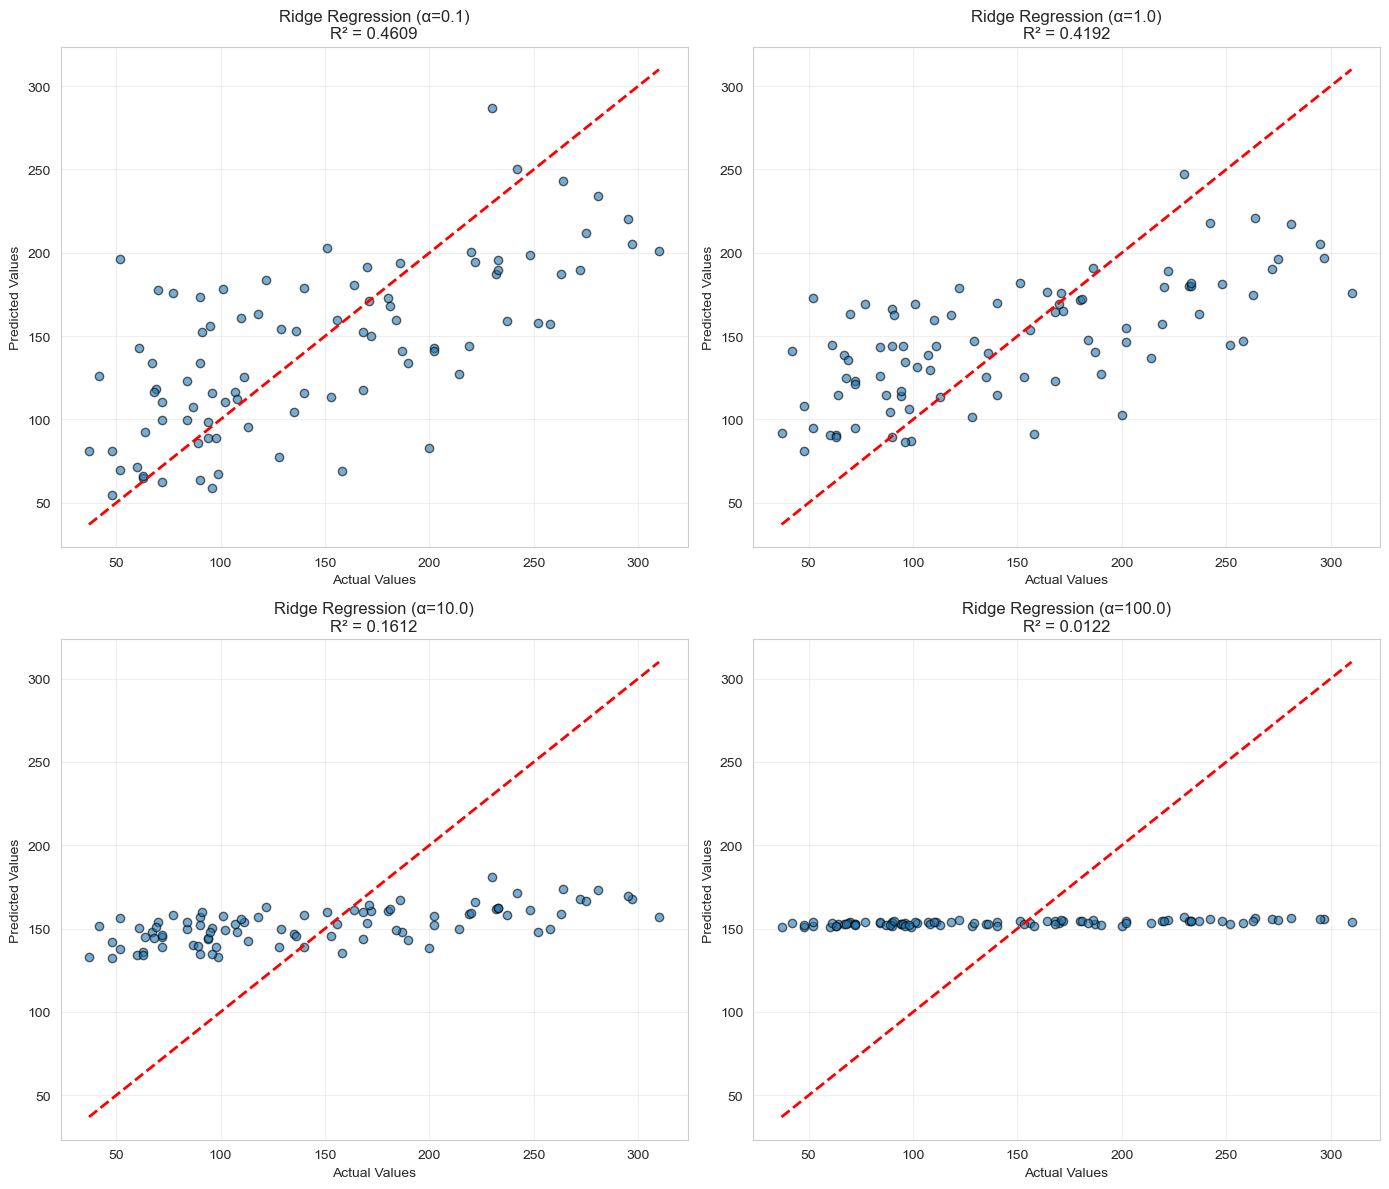

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()
for idx, alpha in enumerate(alphas):
    axes[idx].scatter(y_test_multi, ridge_results[alpha]['predictions'], alpha=0.6, edgecolors='k')
    axes[idx].plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')
    axes[idx].set_title(f'Ridge (α={alpha})\nR² = {ridge_results[alpha]["R²"]:.4f}')
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('screenshots/05_ridge_regression.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Lasso Regression
lasso_results = {}

for alpha in alphas:
    lasso = Lasso(alpha=alpha, max_iter=10000)
    lasso.fit(X_train_multi, y_train_multi)
    y_pred_lasso = lasso.predict(X_test_multi)
    
    mae = mean_absolute_error(y_test_multi, y_pred_lasso)
    mse = mean_squared_error(y_test_multi, y_pred_lasso)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test_multi, y_pred_lasso)
    non_zero = np.sum(lasso.coef_ != 0)
    
    lasso_results[alpha] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R²': r2, 'predictions': y_pred_lasso}
    print(f"Lasso (α={alpha}): MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.4f}, Features={non_zero}/10")

Lasso Regression (alpha=0.1) Performance:
MAE: 42.85
MSE: 2798.19
RMSE: 52.90
R²: 0.4719
Non-zero coefficients: 7/10
--------------------------------------------------
Lasso Regression (alpha=1.0) Performance:
MAE: 49.73
MSE: 3403.58
RMSE: 58.34
R²: 0.3576
Non-zero coefficients: 3/10
--------------------------------------------------
Lasso Regression (alpha=10.0) Performance:
MAE: 64.01
MSE: 5361.53
RMSE: 73.22
R²: -0.0120
Non-zero coefficients: 0/10
--------------------------------------------------
Lasso Regression (alpha=100.0) Performance:
MAE: 64.01
MSE: 5361.53
RMSE: 73.22
R²: -0.0120
Non-zero coefficients: 0/10
--------------------------------------------------


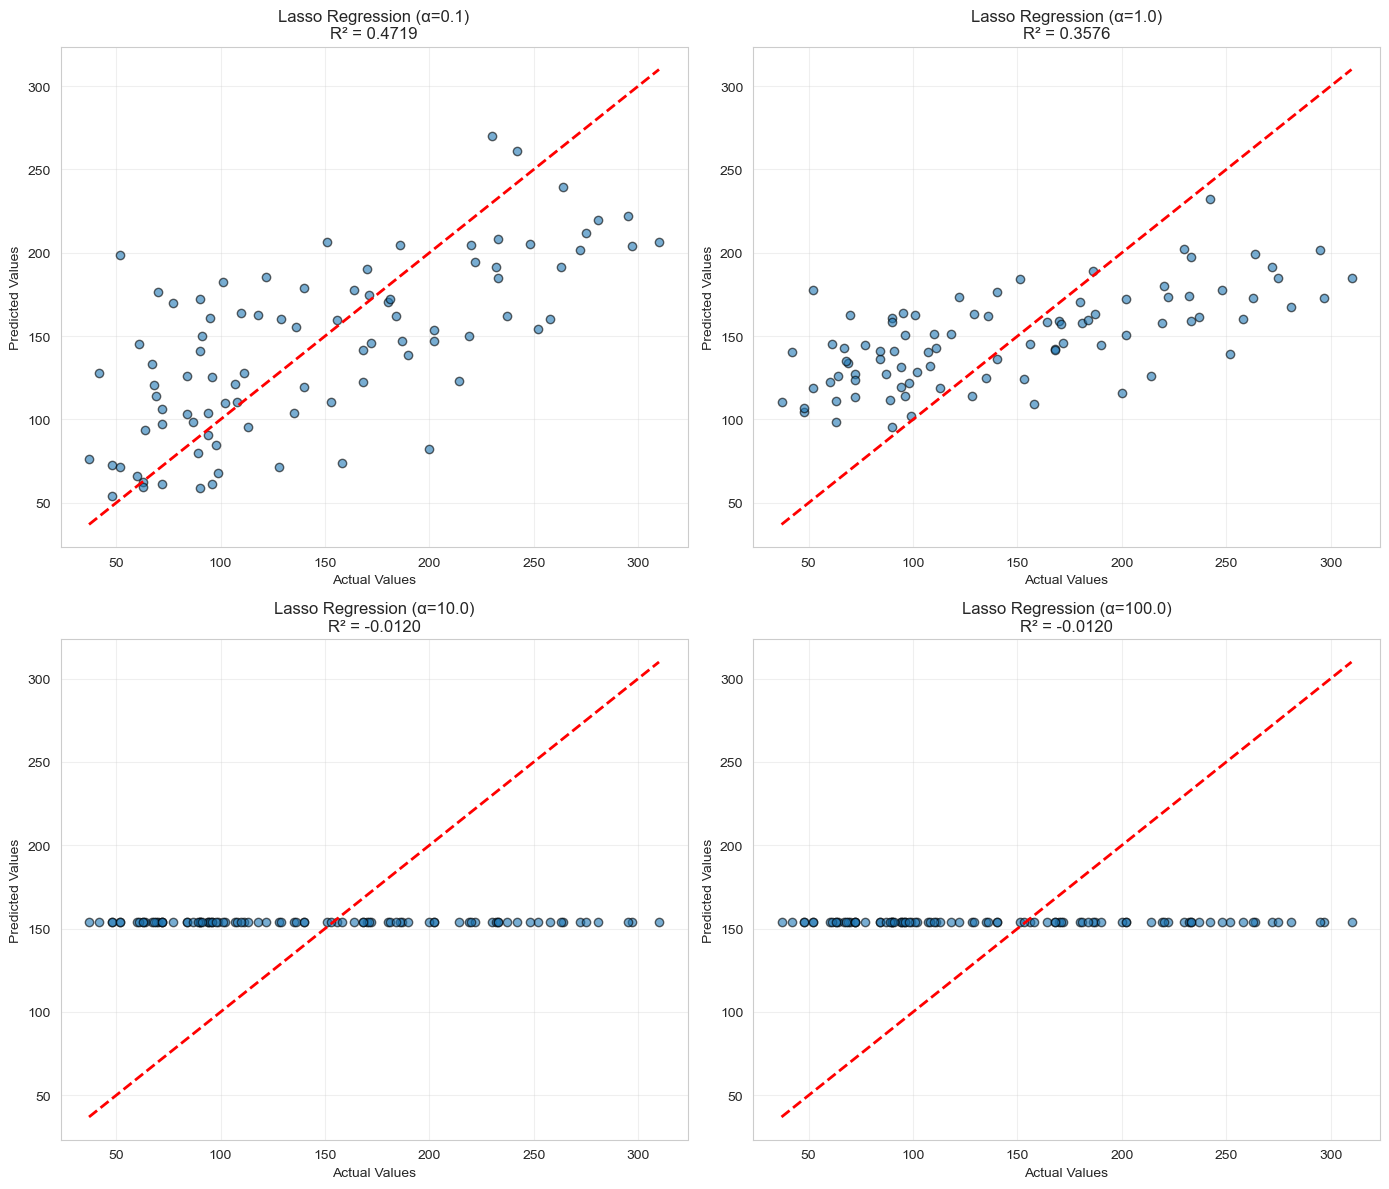

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.ravel()
for idx, alpha in enumerate(alphas):
    axes[idx].scatter(y_test_multi, lasso_results[alpha]['predictions'], alpha=0.6, edgecolors='k')
    axes[idx].plot([y_test_multi.min(), y_test_multi.max()], [y_test_multi.min(), y_test_multi.max()], 'r--', lw=2)
    axes[idx].set_xlabel('Actual')
    axes[idx].set_ylabel('Predicted')
    axes[idx].set_title(f'Lasso (α={alpha})\nR² = {lasso_results[alpha]["R²"]:.4f}')
    axes[idx].grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('screenshots/06_lasso_regression.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# Model Comparison
comparison_data = {
    'Model': ['Simple Linear', 'Multiple'],
    'MAE': [mae_simple, mae_multi],
    'MSE': [mse_simple, mse_multi],
    'RMSE': [rmse_simple, rmse_multi],
    'R²': [r2_simple, r2_multi]
}

for degree in degrees:
    comparison_data['Model'].append(f'Polynomial (deg={degree})')
    comparison_data['MAE'].append(poly_results[degree]['MAE'])
    comparison_data['MSE'].append(poly_results[degree]['MSE'])
    comparison_data['RMSE'].append(poly_results[degree]['RMSE'])
    comparison_data['R²'].append(poly_results[degree]['R²'])

for alpha in alphas:
    comparison_data['Model'].append(f'Ridge (α={alpha})')
    comparison_data['MAE'].append(ridge_results[alpha]['MAE'])
    comparison_data['MSE'].append(ridge_results[alpha]['MSE'])
    comparison_data['RMSE'].append(ridge_results[alpha]['RMSE'])
    comparison_data['R²'].append(ridge_results[alpha]['R²'])

for alpha in alphas:
    comparison_data['Model'].append(f'Lasso (α={alpha})')
    comparison_data['MAE'].append(lasso_results[alpha]['MAE'])
    comparison_data['MSE'].append(lasso_results[alpha]['MSE'])
    comparison_data['RMSE'].append(lasso_results[alpha]['RMSE'])
    comparison_data['R²'].append(lasso_results[alpha]['R²'])

comparison_df = pd.DataFrame(comparison_data)
print("\nModel Performance Comparison:")
print("="*80)
print(comparison_df.to_string(index=False))
print("="*80)

Model Performance Comparison:
                        Model        MAE           MSE       RMSE         R²
     Simple Linear Regression  52.259976   4061.825928  63.732456   0.233350
          Multiple Regression  42.794095   2900.193628  53.853446   0.452603
Polynomial Regression (deg=2)  43.581693   3096.028307  55.641965   0.415640
Polynomial Regression (deg=3) 178.966292  88656.449438 297.752329 -15.733467
Polynomial Regression (deg=4) 261.667144 146907.593453 383.285264 -26.728083
                Ridge (α=0.1)  42.996932   2856.486888  53.446112   0.460852
                Ridge (α=1.0)  46.138858   3077.415939  55.474462   0.419153
               Ridge (α=10.0)  58.030756   4443.952637  66.662978   0.161226
              Ridge (α=100.0)  63.239467   5233.663687  72.344065   0.012172
                Lasso (α=0.1)  42.854428   2798.193485  52.897954   0.471855
                Lasso (α=1.0)  49.730328   3403.575722  58.340172   0.357592
               Lasso (α=10.0)  64.006461   536

In [ ]:
# Visualize key model comparisons
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
key_models = ['Simple Linear', 'Multiple', 'Polynomial (deg=2)', 'Ridge (α=1.0)', 'Lasso (α=1.0)']
key_df = comparison_df[comparison_df['Model'].isin(key_models)]

axes[0, 0].bar(range(len(key_df)), key_df['MAE'], color='skyblue', edgecolor='black')
axes[0, 0].set_xticks(range(len(key_df)))
axes[0, 0].set_xticklabels(key_df['Model'], rotation=45, ha='right')
axes[0, 0].set_ylabel('MAE')
axes[0, 0].set_title('MAE Comparison')
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(range(len(key_df)), key_df['MSE'], color='lightcoral', edgecolor='black')
axes[0, 1].set_xticks(range(len(key_df)))
axes[0, 1].set_xticklabels(key_df['Model'], rotation=45, ha='right')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].set_title('MSE Comparison')
axes[0, 1].grid(True, alpha=0.3)

axes[1, 0].bar(range(len(key_df)), key_df['RMSE'], color='lightgreen', edgecolor='black')
axes[1, 0].set_xticks(range(len(key_df)))
axes[1, 0].set_xticklabels(key_df['Model'], rotation=45, ha='right')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].set_title('RMSE Comparison')
axes[1, 0].grid(True, alpha=0.3)

axes[1, 1].bar(range(len(key_df)), key_df['R²'], color='plum', edgecolor='black')
axes[1, 1].set_xticks(range(len(key_df)))
axes[1, 1].set_xticklabels(key_df['Model'], rotation=45, ha='right')
axes[1, 1].set_ylabel('R²')
axes[1, 1].set_title('R² Comparison')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('screenshots/07_model_comparison_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'plt' is not defined

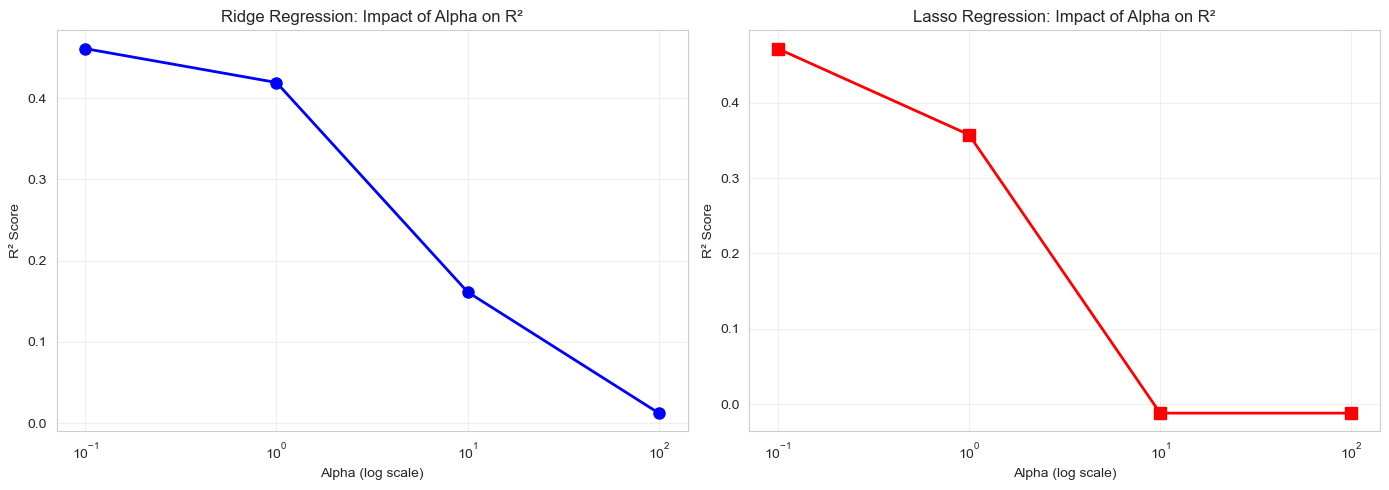

In [ ]:
# Alpha impact on regularization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ridge_r2 = [ridge_results[alpha]['R²'] for alpha in alphas]
axes[0].plot(alphas, ridge_r2, marker='o', linewidth=2, markersize=8, color='blue')
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('R²')
axes[0].set_title('Ridge: Alpha Impact')
axes[0].grid(True, alpha=0.3)

lasso_r2 = [lasso_results[alpha]['R²'] for alpha in alphas]
axes[1].plot(alphas, lasso_r2, marker='s', linewidth=2, markersize=8, color='red')
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('R²')
axes[1].set_title('Lasso: Alpha Impact')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('screenshots/08_alpha_impact.png', dpi=300, bbox_inches='tight')
plt.show()